<a href="https://colab.research.google.com/github/ids01x/personal_projects/blob/main/finance_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [156]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
trainingData = yf.download('AAPL','2010-01-01','2017-01-01') 
testData = yf.download('AAPL','2017-01-01','2019-01-01')
testData2 = yf.download('AAPL','2019-01-01','2020-01-01') 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
def prepare_samples(data,n_steps=6,n_features=1):
    X = []
    y = []

    for i in range(len(data)-n_steps):
        X.append(data['Close'][i:i+n_steps].values)
        y.append(np.array(data['Close'][i+n_steps]))

    X,y = np.array(X),np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], n_features)

    return X,y

In [157]:
n_steps = 6
n_features = 1

X_train,y_train = prepare_samples(trainingData)
X_test,y_test = prepare_samples(testData)
X_test2,y_test2 = prepare_samples(testData2)

In [132]:
def get_model(input_shape=(6,6)):
    """
    LSTM layer takes a 6 days as input
    """
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(16, activation='relu', kernel_regularizer='l1', input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(1)
    ], name='forcaster')
    model.compile(
        loss = 'mse',
        optimizer ='adam'
    )
    return model

In [136]:
model = get_model()
model.summary()

Model: "forcaster"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 16)                1152      
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.005,patience=8)
]
model.fit(x=X_train,y=y_train,batch_size=32,epochs=512,verbose=2, validation_split=0.2,callbacks=callbacks)

In [138]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 2ms/step - loss: 0.7834


0.783363401889801

16/16 [==============================] - 0s 4ms/step


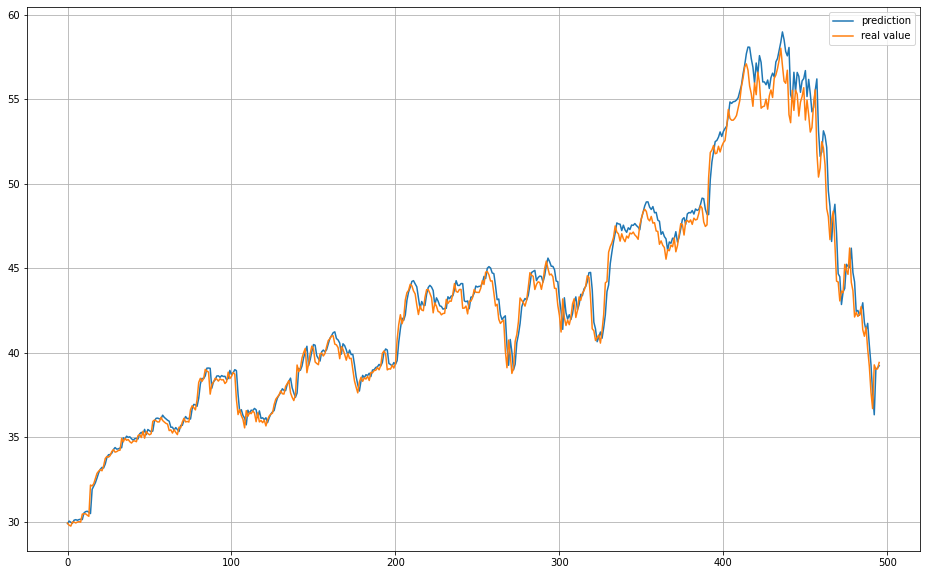

In [140]:
d = model.predict(X_test)
plt.figure(figsize=(16,10))
plt.plot(d, label='prediction')
plt.plot(y_test, label='real value')
plt.legend()
plt.grid()

8/8 [==============================] - 0s 6ms/step


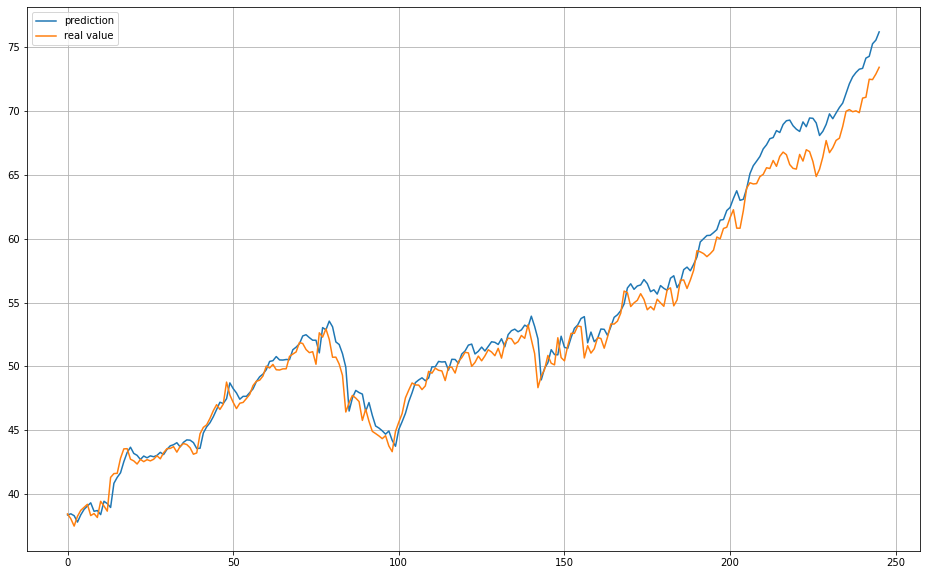

In [158]:
d = model.predict(X_test2)
plt.figure(figsize=(16,10))
plt.plot(d, label='prediction')
plt.plot(y_test2, label='real value')
plt.legend()
plt.grid()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Preprocessing data
Creating a model
training the model
training complete
evaluating the model
16/16 [==============================] - 0s 2ms/step - loss: 1.3938
plotting predictions
8/8 [==============================] - 0s 3ms/step


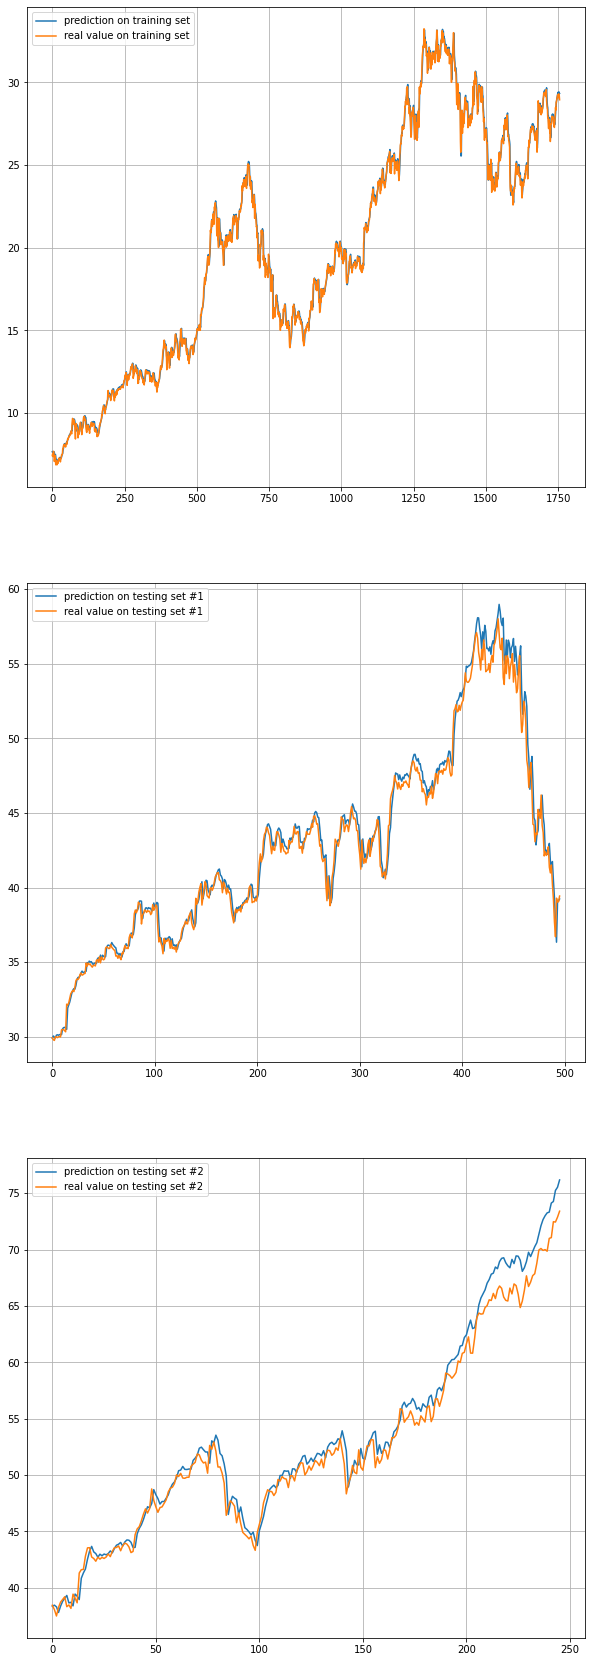

In [163]:
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

def prepare_samples(data,n_steps=6,n_features=1):
    X = []
    y = []

    for i in range(len(data)-n_steps):
        X.append(data['Close'][i:i+n_steps].values)
        y.append(np.array(data['Close'][i+n_steps]))

    X,y = np.array(X),np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], n_features)

    return X,y

def get_model(input_shape=(6,6)):
    """
    LSTM layer takes a 6 days as input
    """
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(16, activation='relu', kernel_regularizer='l1', input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(1)
    ], name='forcaster')
    model.compile(
        loss = 'mse',
        optimizer ='adam'
    )
    return model

def plot_tests():
    d0 = model.predict(X_train)
    d1 = model.predict(X_test)
    d2 = model.predict(X_test2)

    fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10*3))
    ax0.plot(d0, label='prediction on training set')
    ax1.plot(d1, label='prediction on testing set #1')
    ax2.plot(d2, label='prediction on testing set #2')

    ax0.plot(y_train, label='real value on training set')
    ax1.plot(y_test,  label='real value on testing set #1')
    ax2.plot(y_test2, label='real value on testing set #2')

    ax0.legend();ax0.grid()
    ax1.legend();ax1.grid()
    ax2.legend();ax2.grid()

def main(tickers=['AAPL'],n_steps = 6,n_features = 1):
    print("Downloading data")
    trainingData    = yf.download(tickers[0],'2010-01-01','2017-01-01') 
    testingData     = yf.download(tickers[0],'2017-01-01','2019-01-01')
    testingData2    = yf.download(tickers[0],'2019-01-01','2020-01-01') 

    print("Preprocessing data")
    X_train,y_train = prepare_samples(trainingData, n_steps=n_steps,n_features=n_features)
    X_test,y_test   = prepare_samples(testingData,  n_steps=n_steps,n_features=n_features)
    X_test2,y_test2 = prepare_samples(testingData2, n_steps=n_steps,n_features=n_features)

    print("Creating a model")
    model = get_model()
    
    print("training the model")
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.005,patience=8)]
    model.fit(x=X_train,y=y_train,batch_size=32,epochs=512,verbose=0, validation_split=0.2,callbacks=callbacks) 
    
    print("training complete")

    print("evaluating the model")
    model.evaluate(X_test, y_test)

    print("plotting predictions")
    plot_tests()

main()